<a href="https://colab.research.google.com/github/ykim68ncstate/ST-554-Project1/blob/main/Homework_4_YujinKim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summarizing Student Data Graphically

## HW3 Code: Summarizing Data Numerically

For this part, we’ll use the StudentData.txt data (available here https://www4.stat.ncsu.edu/~online/datasets/StudentData.txt) that comes from the UCI machine learning repository. Information about the variables in the dataset can be found here https://archive.ics.uci.edu/ml/datasets/Student+Performance. I want you to look at the math scores data set.

You should read up on the variables. The dataset is generally about math scores (G1, G2, G3) for students from two different schools. They also measure a bunch of things about the students’ home life. Hopefully you can make some interesting connections!

### Task 1: Read in the data

* You can either read this dataset from the URL or download it and read it in locally. Check out the
first few observations of the data.

In [ ]:
import pandas as pd
student_data = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/StudentData.txt", sep = ";")
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### Task 2: Summarize the Data

This data has many categorical variables and a few numeric. You should do the following:



#### **HW3: Categorical variables**

* Create a one-way contingency table, a two-way contingency table, and a three-way contingency table

  – Interpret a number from each resulting table (that is, pick out a value produced and explain what that value means.)

In [ ]:
oneway = pd.crosstab(student_data["school"], columns = "count")
oneway

col_0,count
school,
GP,349
MS,46


One way table shows the number of students attending each school, GP and MS."

In [ ]:
twoway = pd.crosstab(student_data["school"], student_data["sex"])
twoway

sex,F,M
school,,
GP,183,166
MS,25,21


Two way table shows the number of male and female students attending each school.

In [ ]:
thrway = pd.crosstab(index = [student_data["school"], student_data["sex"]], columns = student_data["address"])
thrway

address      R    U
school sex         
GP     F    31  152
       M    32  134
MS     F    13   12
       M    12    9

Three way table shows the number of students by school, sex, and type of address, U(urban) and R(Rural).

* Create a conditional two-way table. That is, condition on one variable’s setting and create a two-way table. Do this using two different methods:

  – Once, by subsetting the data (say with .loc) and then creating the two-way table

  – Once, by creating a three-way table and subsetting it

In [ ]:
GP = student_data.loc[student_data["school"] == "GP"]
GP_coud = pd.crosstab(GP["sex"], GP["address"])
GP_coud

address,R,U
sex,,
F,31,152
M,32,134


In [ ]:
thrway.loc["GP"]

address,R,U
sex,,
F,31,152
M,32,134


#### **HW3: Numeric variables (and across groups)**

The numeric variables are age, absences, and the three test grades variables (G1, G2, and G3).

* Find measures of center and spread for three of these variables (including G3 as one of them)

  – Repeat while subsetting the data by some grouping variable (say with .loc)


In [ ]:
student_data[["age", "absences", "G3"]].describe()

,age,absences,G3
count,395.000000,395.000000,395.000000
mean,16.696203,5.708861,10.415190
std,1.276043,8.003096,4.581443
min,15.000000,0.000000,0.000000
25%,16.000000,0.000000,8.000000
50%,17.000000,4.000000,11.000000
75%,18.000000,8.000000,14.000000
max,22.000000,75.000000,20.000000


In [ ]:
student_data.loc[student_data["sex"] == "F", ["age", "absences", "G3"]].describe()

,age,absences,G3
count,208.000000,208.000000,208.000000
mean,16.730769,6.216346,9.966346
std,1.201696,9.445819,4.622338
min,15.000000,0.000000,0.000000
25%,16.000000,0.000000,8.000000
50%,17.000000,4.000000,10.000000
75%,18.000000,8.000000,13.000000
max,20.000000,75.000000,19.000000


* Find measures of center and spread across a single grouping variable for three of these variables (including G3 as one of them)


In [ ]:
student_data.groupby("school")[["age", "absences", "G3"]].describe()

age                                                     absences  \
        count       mean       std   min    25%   50%   75%   max    count   
school                                                                       
GP      349.0  16.521490  1.216610  15.0  16.00  16.0  17.0  22.0    349.0   
MS       46.0  18.021739  0.881643  17.0  17.25  18.0  18.0  21.0     46.0   

                  ...                 G3                                       \
            mean  ...   75%   max  count       mean       std  min  25%   50%   
school            ...                                                           
GP      5.965616  ...  8.00  75.0  349.0  10.489971  4.625397  0.0  8.0  11.0   
MS      3.760870  ...  4.75  17.0   46.0   9.847826  4.237229  0.0  8.0  10.0   

                     
          75%   max  
school               
GP      14.00  20.0  
MS      12.75  19.0  

[2 rows x 24 columns]

* Find measures of center and spread across two grouping variables for three of these variables (including
G3 as one of them)

In [ ]:
student_data.groupby(["school", "sex"])[["age", "absences", "G3"]].describe()

age                                                    absences  \
            count       mean       std   min   25%   50%   75%   max    count   
school sex                                                                      
GP     F    183.0  16.579235  1.173426  15.0  16.0  16.0  17.0  19.0    183.0   
       M    166.0  16.457831  1.263005  15.0  15.0  16.0  17.0  22.0    166.0   
MS     F     25.0  17.840000  0.746101  17.0  17.0  18.0  18.0  20.0     25.0   
       M     21.0  18.238095  0.995227  17.0  18.0  18.0  19.0  21.0     21.0   

                      ...                G3                                 \
                mean  ...  75%   max  count       mean       std  min  25%   
school sex            ...                                                    
GP     F    6.639344  ...  8.0  75.0  183.0   9.972678  4.604622  0.0  8.0   
       M    5.222892  ...  8.0  38.0  166.0  11.060241  4.594725  0.0  9.0   
MS     F    3.120000  ...  4.0  17.0   25.0   9.920000  4.846992  0.0  9.0   
       M    4.523810  ...  5.0  14.0   21.0   9.761905  3.491486  0.0  8.0   

                              
             50%   75%   max  
school sex                    
GP     F    11.0  13.0  19.0  
       M    11.0  14.0  20.0  
MS     F    10.0  13.0  19.0  
       M    10.0  12.0  16.0  

[4 rows x 24 columns]

* Create a correlation matrix between all of the numeric variables

In [ ]:
student_data[["age", "absences", "G1", "G2", "G3"]].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


## HW4: Task 1

### **HW4: Categorical variables**
* Create a stacked bar graph and a side-by-side bar graph. Give relevant x and y labels, and a title for the plots.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
ct = pd.crosstab(student_data["school"], student_data["sex"])
ct

sex,F,M
school,,
GP,183,166
MS,25,21


#### Stacked bar graph

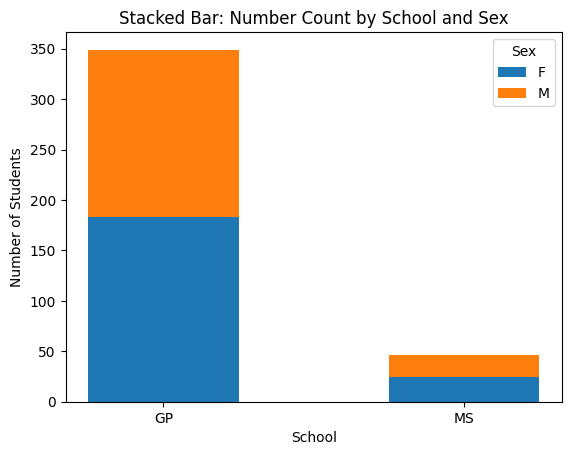

In [ ]:
schools = ct.index.tolist()
sexes = ct.columns.tolist()

counts = {
    sex: ct[sex].values for sex in sexes
}

width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(len(schools))

for sex, values in counts.items():
    ax.bar(schools, values, width, label=sex, bottom=bottom)
    bottom += values

ax.set_xlabel("School")
ax.set_ylabel("Number of Students")
ax.set_title("Stacked Bar: Number Count by School and Sex")
ax.legend(title="Sex")

plt.show()

#https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

This stacked bar chart shows the distribution of male and female students across schools. Using a stacked format amkes it easy to compare both the total number of students and the composition within each school.

#### Side-by-side bar graph


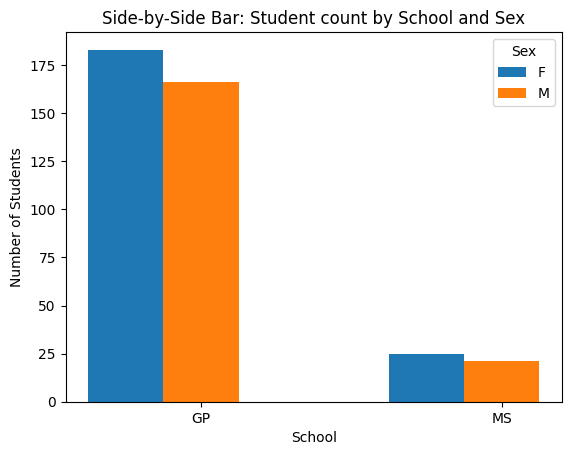

In [ ]:
x = np.arange(len(schools))
width = 0.25
fig, ax = plt.subplots()

for i, sex in enumerate(sexes):
    ax.bar(x + i*width, ct[sex].values, width, label = sex)

ax.set_ylabel('Number of Students')
ax.set_xlabel("School")
ax.set_title('Side-by-Side Bar: Student count by School and Sex')
ax.set_xticks(x + width, schools)
ax.legend(title = "Sex")

plt.show()

#https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

The side-by-side bar graph allows for a direct comparison of the number of male and female students across schools.

Compared to the stacked bar graph, this visualization makes it easier to see the absolute differences between groups rather than thier proportions.

### HW4: Numeric variables

The numeric variables are age, absences, and the three test grades variables (G1, G2, and G3).

* Create a histogram, kernel density plot, and boxplot for two of the numeric variables across one of the categorical variables (that is, create graphs that can compare the distributions across the groups). For at least one of the kernel density plots across groups, make sure that the graphs are overlayed on the same plot. Add appropriate labels and titles.



#### Histogram

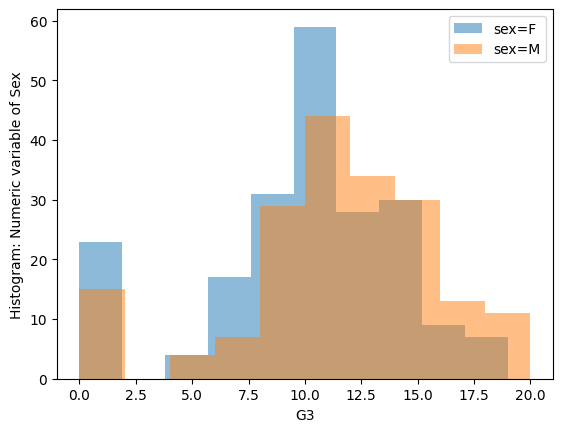

In [ ]:
category_var = "sex"
numeric_var = "G3"

for g, df_g in student_data.groupby(category_var):
    plt.hist(df_g[numeric_var].dropna(), alpha = 0.5, label=f"{category_var}={g}")

plt.xlabel(numeric_var)
plt.ylabel("Histogram: Numeric variable of Sex")
plt.legend()
plt.show()


This histogram shows the distribution of G3 for female and male students.
The distributions for both groups largerly overlap. indicating that overall performance is similar across sexes.
However, male students appear slightly more concentrated in the higher score range.

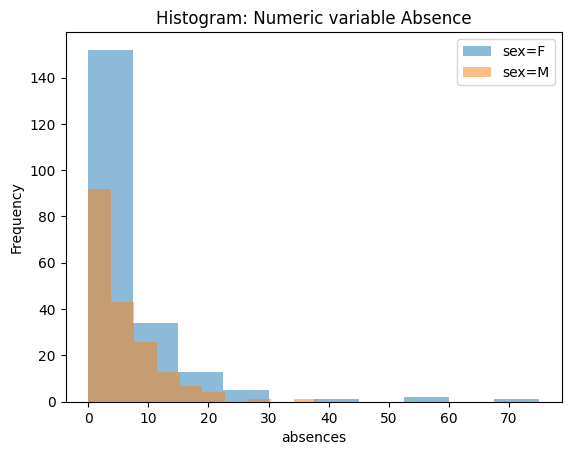

In [ ]:
numeric_var2 = "absences"

for g, df_g in student_data.groupby(category_var):
    plt.hist(df_g[numeric_var2].dropna(), alpha = 0.5, label=f"{category_var}={g}")

plt.xlabel(numeric_var2)
plt.ylabel("Frequency")
plt.title("Histogram: Numeric variable Absence")
plt.legend()
plt.show()

This histogram displays the distribution of absences for female and male students. For both groups, the distribution is highly right-skewed, with most students having a small number of absences.

Female students appear slightly more concentrated near zero absences, while male students show a somewhat wider spread.

#### Kernel Density Plot

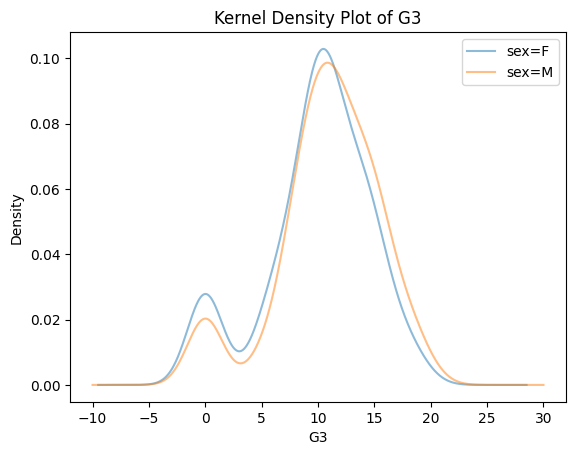

In [ ]:
numeric_var_k = "G3"

for g, df_g in student_data.groupby(category_var):
    df_g[numeric_var_k].dropna().plot(kind = "kde", alpha = 0.5, label=f"{category_var}={g}")

plt.xlabel(numeric_var_k)
plt.ylabel("Density")
plt.title("Kernel Density Plot of G3")
plt.legend()
plt.show()

The kernel density plot shows the smoothed distribution of G3 by sex.
The density curves for male and female students largely overlap, suggeting similar overall performance patterns.

Small differences in the peaks and spread indicate minor variation in how scores are distributed across the two groups.

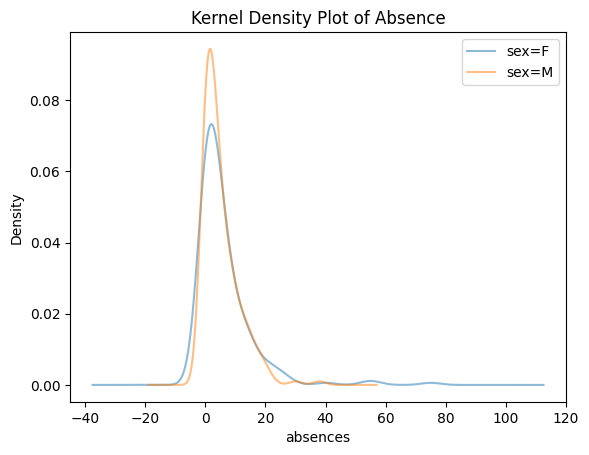

In [ ]:
numeric_var_k2 = "absences"

for g, df_g in student_data.groupby(category_var):
    df_g[numeric_var_k2].dropna().plot(kind = "kde", alpha = 0.5, label=f"{category_var}={g}")

plt.xlabel(numeric_var_k2)
plt.ylabel("Density")
plt.title("Kernel Density Plot of Absence")
plt.legend()
plt.show()

This kernel density plot illustrates the distribution of absences for male and female students.
The long right tail reflects a small number of students with very high absence counts, while overall patterns remain similar between groups.

#### Boxplot

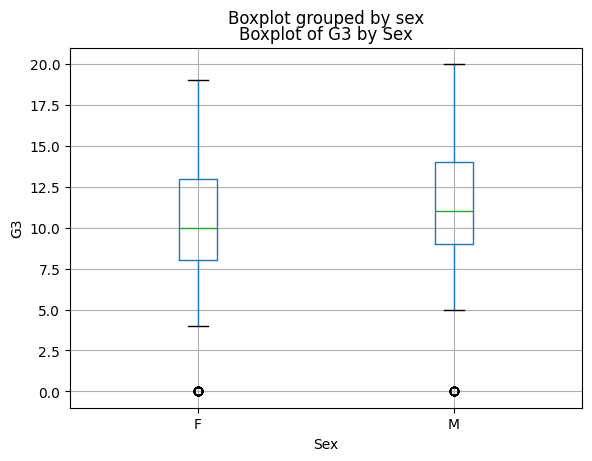

In [ ]:
student_data.boxplot(column="G3", by = "sex")

plt.xlabel("Sex")
plt.ylabel("G3")
plt.title("Boxplot of G3 by Sex")
plt.show()

This boxplot summarizes the distribution of G3 by sex.
The median G3 values for male and female students are very similar, indicating comparable central tendencies.
A small number of outliers appear in both groups, representing students with unusually low or high grades.

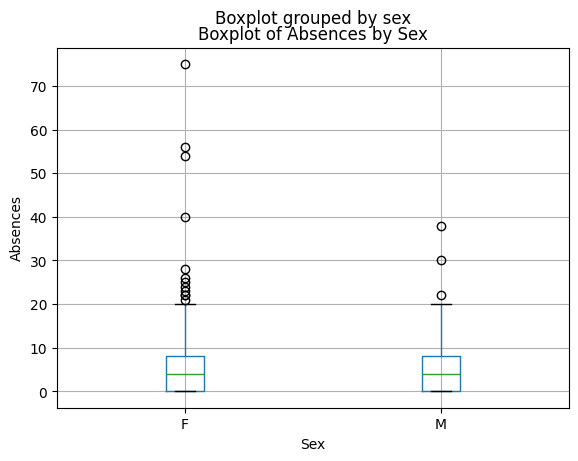

In [ ]:
student_data.boxplot(column="absences", by = "sex")

plt.xlabel("Sex")
plt.ylabel("Absences")
plt.title("Boxplot of Absences by Sex")
plt.show()

This boxplot shows the distribution of absences for male and female students.
The presence of numerous high-value outliers highlights a small number of students with exceptionally high absence counts.
While male students exhibit silightly greater spread, the overall absence patterns are similar between the two groups.

#### Scatterplot

* Create two scatterplots relating G3 to other numeric variables (G3 on the y-axis). Color the points by a categorical variable in each. Add appropriate labels and titles

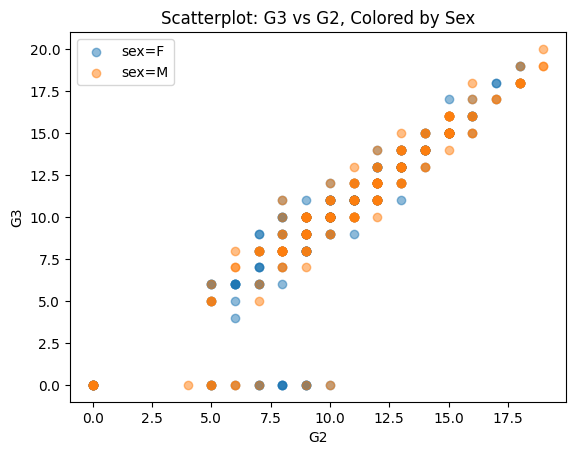

In [ ]:
for g, df_g in student_data.groupby(category_var):
    plt.scatter(df_g["G2"], df_g["G3"].dropna(), alpha = 0.5, label=f"{category_var}={g}")

plt.xlabel("G2")
plt.ylabel("G3")
plt.title("Scatterplot: G3 vs G2, Colored by Sex")
plt.legend()
plt.show()

This scatterplot shows the relationship between G2 and G3 with points colored by sex.
A strong positive relationship is observed, indicating that students who perform well earlier in the course tend to achieve higher final grades.
The patterns for male and female students largely overlap, suggesting similar performance trends across sexes.

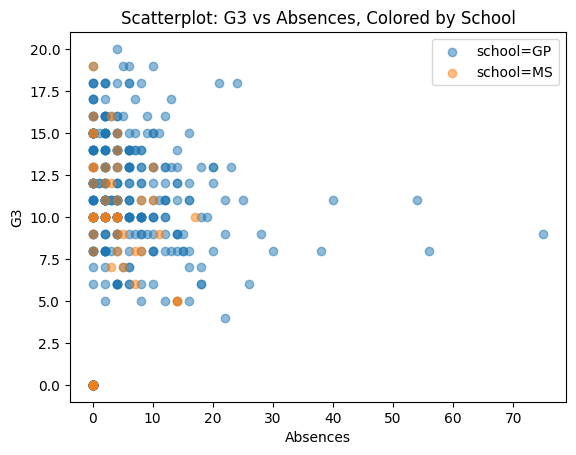

In [ ]:
for g, df_g in student_data.groupby("school"):
    plt.scatter(df_g["absences"], df_g["G3"].dropna(), alpha = 0.5, label=f"school={g}")

plt.xlabel("Absences")
plt.ylabel("G3")
plt.title("Scatterplot: G3 vs Absences, Colored by School")
plt.legend()
plt.show()

This scatterplot illustrates the relationship between absences and G3, with points colored by school.
A general downward trend suggests that higher numbers of absences are associated with lower final grades.
Students from both school follow similar patterns, indicating that the relationship between absences and performance is consistent across the school.

# Plotting the NFL Data

## Task 1: Read in the data
* You can either read this dataset from the URL or download it and read it in locally. Check out the first few observations of the data.


In [ ]:
scores = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv")
scores.head()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0


* Convert the homeTeam, awayTeam, day, stadium, startTime, toss, roof, and surface to category
type variables.

In [ ]:
categorical_vars = ["homeTeam", "awayTeam", "day", "stadium", "startTime", "toss", "roof", "surface"]

for var in categorical_vars:
    scores[var] = scores[var].astype("category")

scores.dtypes

,0
week,object
date,object
day,category
season,int64
awayTeam,category
...,...
home4thConv,int64
home4thAtt,int64
homeTOP,float64
HminusAScore,int64


## Task 2: Summarize the data

* I want you to look at some trends during the regular season. This means you should remove any data where the week is not 1 through 17.

In [ ]:
scores["week"].dtype

dtype('O')

In [ ]:
scores["week"] = pd.to_numeric(scores["week"], errors="coerce")
scores["week"].dtype

dtype('float64')

In [ ]:
regular_season = scores[(scores["week"] >= 1) & (scores["week"] <= 17)]
regular_season["week"].describe()

,week
count,3328.000000
mean,9.124099
std,4.992503
min,1.000000
25%,5.000000
50%,9.000000
75%,13.250000
max,17.000000


In [ ]:
scores["week"].isna().sum()

np.int64(143)


* You should summarize some of the variables grouped by season and week, season alone, and week alone (three different scenarios).

  – Produce some common numeric summaries of variables across these different groups.

  – Similarly, produce some common plots over time (mostly line plots I’d think!)


In [ ]:
regular_season = scores[(scores["week"] >= 1) & (scores["week"] <= 17)].copy()
regular_season["totalPoints"] = regular_season["HFinal"] + regular_season["AFinal"]


### Season and Week

In [ ]:
season_week_summary = (regular_season.groupby(["season", "week"])[["HFinal", "AFinal", "totalPoints"]].agg(["mean", "median", "std"]))
season_week_summary.head()

HFinal                       AFinal                    \
                  mean median        std       mean median        std   
season week                                                             
2002   1.0   26.125000   27.0  11.050641  23.125000   23.0   9.680737   
       2.0   18.187500   16.5  10.387292  22.687500   23.5  12.354318   
       3.0   24.428571   27.0  11.460395  19.571429   22.0  11.765100   
       4.0   28.285714   27.0  14.187907  18.928571   19.0   8.939663   
       5.0   23.214286   25.5   8.441460  24.000000   23.0  10.355229   

            totalPoints                    
                   mean median        std  
season week                                
2002   1.0    49.250000   49.0  16.874043  
       2.0    40.875000   38.0  14.619051  
       3.0    44.000000   39.0  17.637373  
       4.0    47.214286   44.5  18.958167  
       5.0    47.214286   48.0  13.879584

/tmp/ipython-input-1390213016.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = "Season")


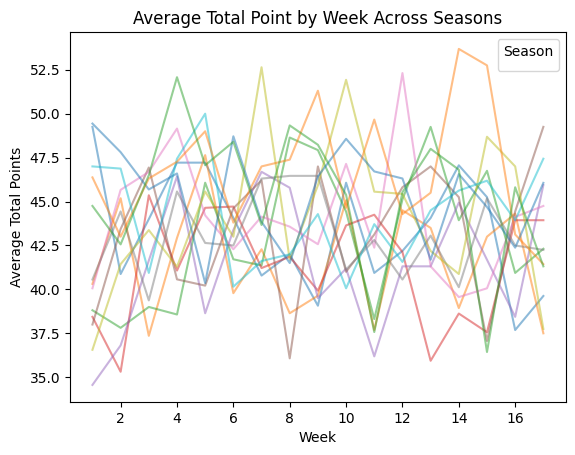

In [ ]:
season_week_avg = (regular_season.groupby(["season", "week"])["totalPoints"].mean().reset_index())

for s, df_s in season_week_avg.groupby("season"):
    plt.plot(df_s["week"], df_s["totalPoints"], alpha = 0.5)

plt.xlabel("Week")
plt.ylabel("Average Total Points")
plt.title("Average Total Point by Week Across Seasons")
plt.legend(title = "Season")
plt.show()

This line plot shows the average total points scored per game by week.
Each line represents a different season, which results in a dense visualization when many seasons are overlaid.
While week to week variability is evident within individual seasons, there is no clear monotonic trend across weeks that is consistent for all seasons.
Overall, scoring patterns fluctuate throughout the regular season, and these fluctuation vary across different seasons.

### Season

In [ ]:
season_summary = (regular_season.groupby("season")[["HFinal", "AFinal", "totalPoints"]].agg(["mean", "median", "std"]))
season_summary.head()

HFinal                       AFinal                   totalPoints  \
             mean median        std       mean median        std        mean   
season                                                                         
2002    22.796875   23.0  10.182152  20.550781   20.5  10.064759   43.347656   
2003    22.609375   23.0  10.119470  19.054688   19.0  10.251970   41.664062   
2004    22.738281   23.0  10.400502  20.230469   19.0  10.175596   42.968750   
2005    22.441406   21.0   9.797383  18.792969   19.0   9.948894   41.234375   
2006    21.082031   20.0   9.856475  20.234375   21.0  10.386254   41.316406   

                          
       median        std  
season                    
2002     43.0  14.558342  
2003     41.0  13.960323  
2004     41.5  15.046301  
2005     41.0  13.182570  
2006     41.0  14.215343

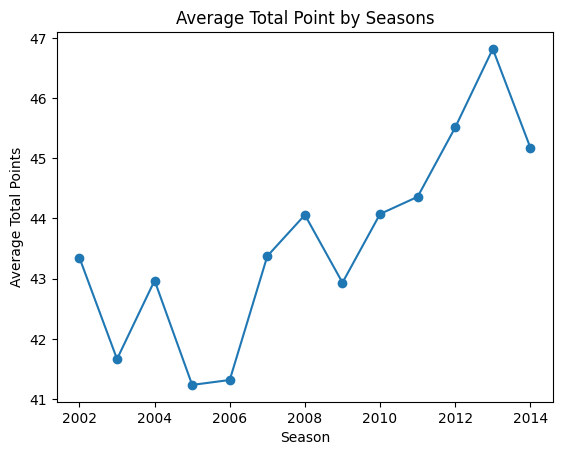

In [ ]:
season_avg = (regular_season.groupby("season")["totalPoints"].mean().reset_index())

plt.plot(season_avg["season"], season_avg["totalPoints"], marker = "o")
plt.xlabel("Season")
plt.ylabel("Average Total Points")
plt.title("Average Total Point by Seasons")
plt.show()

### Week

In [ ]:
week_summary = (regular_season.groupby("week")[["HFinal", "AFinal", "totalPoints"]].agg(["mean", "median", "std"]))
week_summary.head()

HFinal                       AFinal                   totalPoints  \
           mean median        std       mean median        std        mean   
week                                                                         
1.0   22.139423   20.5  10.595541  19.716346   20.0   8.977768   41.855769   
2.0   22.840580   23.0   9.842384  19.545894   20.0  10.433170   42.386473   
3.0   22.646465   23.0  10.153955  20.767677   23.0   9.634781   43.414141   
4.0   24.092391   23.0  10.874704  20.983696   20.0  10.062361   45.076087   
5.0   24.324176   24.0  10.158379  20.527473   20.5  10.300824   44.851648   

                        
     median        std  
week                    
1.0    41.0  13.973694  
2.0    42.0  14.217295  
3.0    43.0  13.617330  
4.0    44.0  13.953266  
5.0    45.5  13.531015

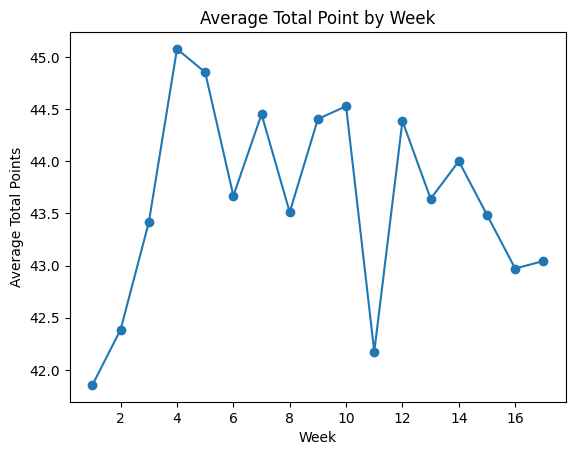

In [ ]:
week_avg = (regular_season.groupby("week")["totalPoints"].mean().reset_index())

plt.plot(week_avg["week"], week_avg["totalPoints"], marker = "o")
plt.xlabel("Week")
plt.ylabel("Average Total Points")
plt.title("Average Total Point by Week")
plt.show()

This plot summarizes scoring trends across the regular-season schedule when all seasons are combined.
It helps identify whether cetain weeks tend to have higher or lower scoring on average.

Compared to season-level averages, week-level average exhibit greater variability and do not show a clear, consistent pattern across the regular season.
This suggests that scoring fluctuations are more pronounced on a week to week basis than across entire seasons.

This plot shows how average total points per game very across seasons. It highlights long-term changes in scoring level rather than week to week variation.

### Create Plot Function
* Write at least one function that can be used to easily create a plot for this data.

  – For instance, you might have a function that takes in a numeric variable and a statistic (or a categorical variable, etc.). Then the function plots the average (or some other statistic) of the numeric variable across the seasons.

  – This is just an example! You get to decide what might be useful to do here.

  – Add in type hints for the inputs (pd.DataFrame was one I used) using annotations in the function definition.

  – Don’t worry about type hinting the output. If you are interested, something like this could work. . .

  – Add the timeit decorator used in the class notes as well so information is printed out about how long the code took to run.

  – Run this function with three different settings of inputs (to obtain three different graphs of the same type - or whatever it is your function does!)

In [ ]:
def plot_average(
    df: pd.DataFrame,
    value_col: str,
    group_col: str
):
    """
    Create a line plot of the average by season or week
    """
    summary = (df.groupby(group_col)[value_col].mean().reset_index())

    plt.plot(summary[group_col], summary[value_col], marker = "o")
    plt.xlabel(group_col.capitalize())
    plt.ylabel(f"Average {value_col}")
    plt.title(f"Average {value_col} by {group_col}")
    plt.show()

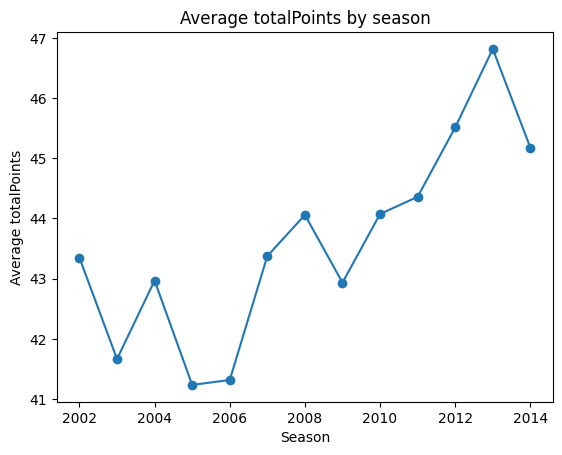

In [ ]:
plot_average(regular_season, "totalPoints", "season")

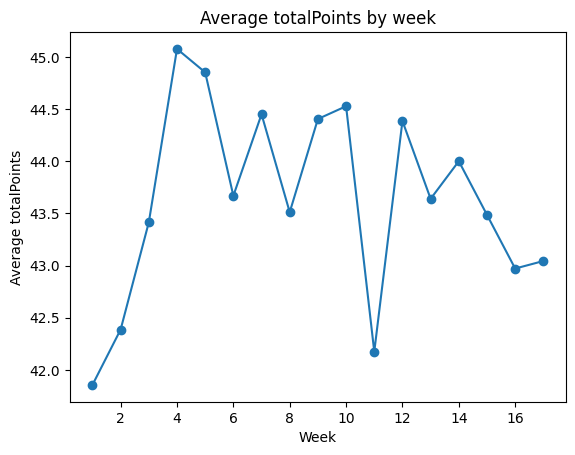

In [ ]:
plot_average(regular_season, "totalPoints", "week")